In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import transforms as T
from torchvision import models
from torch.utils.data import Dataset, DataLoader
import glob
from astropy.visualization import AsinhStretch, simple_norm
from torchvision.utils import make_grid
#import os
#from torchvision.io import read_image
from tqdm import tqdm
import pandas as pd

path = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1mocks/'
#stretch = AsinhStretch()
pad_val = int((256-202)/2)
BATCH_SIZE = 32

class BinaryMergerDataset(Dataset): #in future: put this in one file and always call it!
    def __init__(self, data_path, dataset, mergers = True, transform=None, codetest=True):
        self.dataset = dataset
        self.mergers = mergers
        self.codetest=codetest
        if self.dataset == 'train':
            if mergers == True:
                self.images = glob.glob(data_path + 'training/anymergers/allfilters*.npy')
                self.img_labels = np.load(data_path + 'training/anymergers/mergerlabel.npy')
            else:
                self.images = glob.glob(data_path + 'training/nonmergers/allfilters*.npy')
                self.img_labels = np.load(data_path + 'training/nonmergers/mergerlabel.npy')
        elif self.dataset == 'validation':
            if mergers == True:
                self.images = glob.glob(data_path + 'validation/anymergers/allfilters*.npy')
                self.img_labels = np.load(data_path + 'validation/anymergers/mergerlabel.npy')
            else:
                self.images = glob.glob(data_path + 'validation/nonmergers/allfilters*.npy')
                self.img_labels = np.load(data_path + 'validation/nonmergers/mergerlabel.npy')
        elif self.dataset == 'test':
            if mergers == True:
                self.images = glob.glob(data_path + 'test/anymergers/allfilters*.npy')
                self.img_labels = np.load(data_path + 'test/anymergers/mergerlabel.npy')
            else:
                self.images = glob.glob(data_path + 'test/nonmergers/allfilters*.npy')
                self.img_labels = np.load(data_path + 'test/nonmergers/mergerlabel.npy')
        
        self.transform = transform
        

    def __len__(self):
        if self.codetest:
            return len(self.img_labels[0:10])
        else:   
            return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        #print(idx)
        image = np.load(img_path) #keep as np array to normalize
        image = image[:,:,1:4]
        #print('image shape: ', np.shape(image))
        #image = stretch(image)
        image = image * 1e20 #test to get magnitudes up
        power = simple_norm(image, 'power', power = 0.1)
        image = power(image)
        label_file = self.img_labels
        #print('first label call: ', np.shape(label))
        label = label_file[idx]
        # if label != 0:
        #     print(label)
        #print(labels)
        #label = np.load(label_path)[idx]
        #print('label shape: ',np.shape(labels))
        if self.transform is not None:
            image = self.transform(image)

        return image, int(label)



# train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


def get_transforms(train=True):
    transforms = []
    transforms.append(T.ToTensor())
    if train == True:
        transforms.append(torch.nn.Sequential(
        T.RandomRotation(30), 
        T.RandomHorizontalFlip(0.5),
        T.RandomVerticalFlip(0.5),
        T.Pad(pad_val)
        ))
    else: transforms.append(T.Pad(pad_val))
        
    return T.Compose(transforms)

def save_checkpoint(model, optimizer, save_path, epoch):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch
    }, save_path)

accuracylist = []

train_mergers_dataset = BinaryMergerDataset(path, 'train', mergers = True, transform = get_transforms(train=True), codetest=True)
train_nonmergers_dataset = BinaryMergerDataset(path, 'train', mergers = False, transform = get_transforms(train=True), codetest=True)

train_dataset_full = torch.utils.data.ConcatDataset([train_mergers_dataset, train_nonmergers_dataset])
train_dataloader = DataLoader(train_dataset_full, shuffle = True, num_workers = 1, batch_size=BATCH_SIZE)

validation_mergers_dataset = BinaryMergerDataset(path, 'validation', mergers = True, transform = get_transforms(train=False), codetest=True)
validation_nonmergers_dataset = BinaryMergerDataset(path, 'validation', mergers = False, transform = get_transforms(train=False), codetest=True)

validation_dataset_full = torch.utils.data.ConcatDataset([validation_mergers_dataset, validation_nonmergers_dataset])
validation_dataloader = DataLoader(validation_dataset_full, shuffle = True, num_workers = 1, batch_size=BATCH_SIZE)#num workers used to be 4


torch.Size([3, 256, 256])
torch.Size([20, 3, 256, 256])
torch.Size([256, 256, 3])


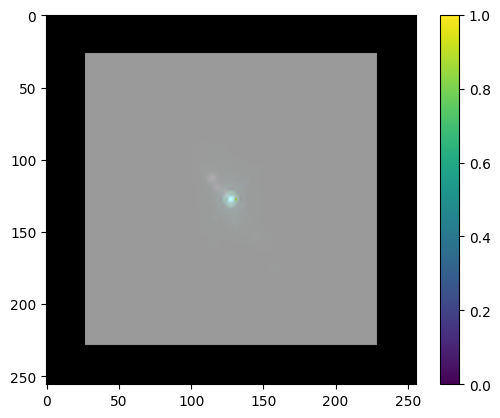

torch.Size([256, 256, 3])


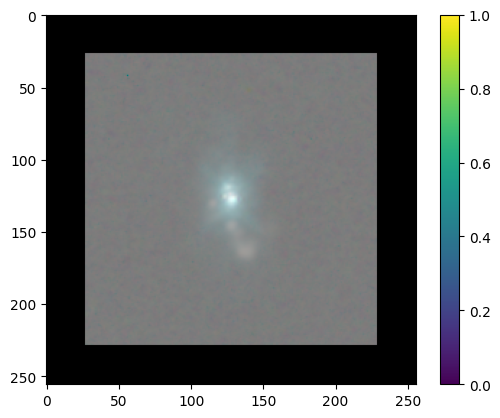

torch.Size([256, 256, 3])


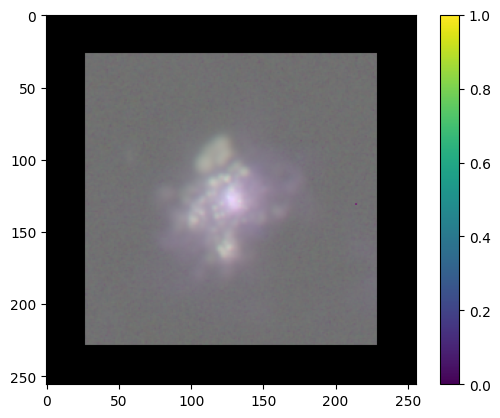

torch.Size([256, 256, 3])


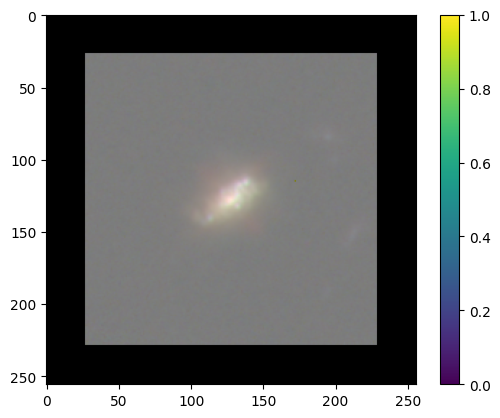

torch.Size([256, 256, 3])


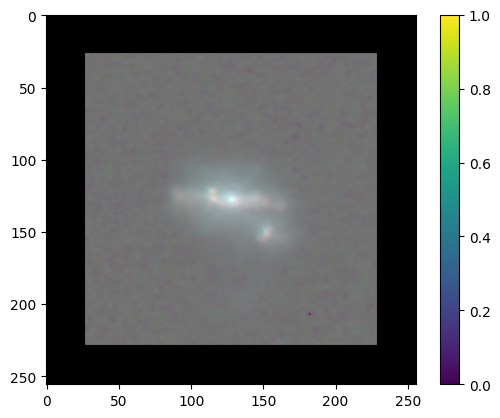

torch.Size([256, 256, 3])


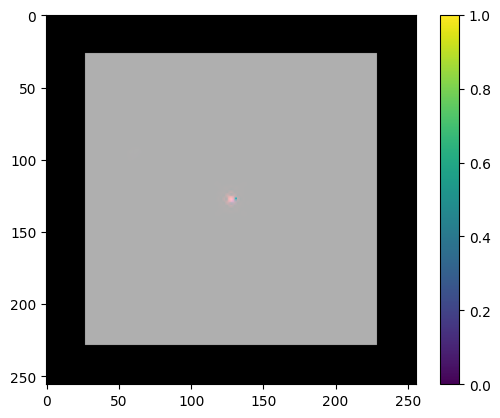

torch.Size([256, 256, 3])


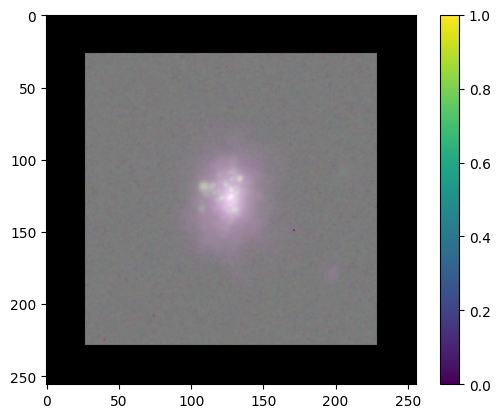

torch.Size([256, 256, 3])


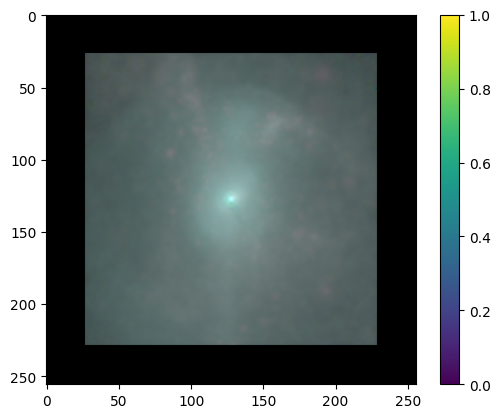

torch.Size([256, 256, 3])


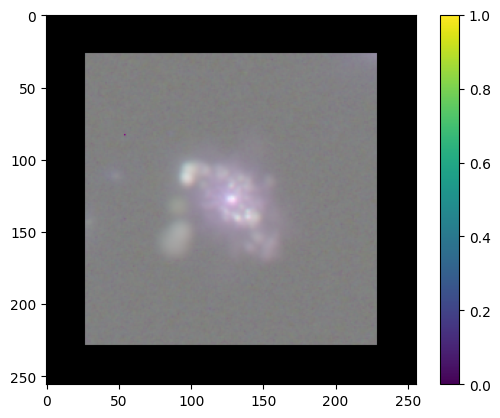

torch.Size([256, 256, 3])


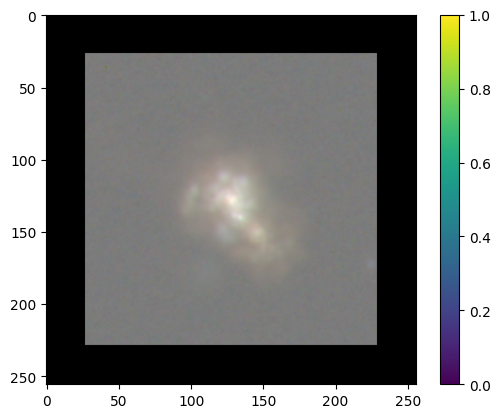

torch.Size([256, 256, 3])


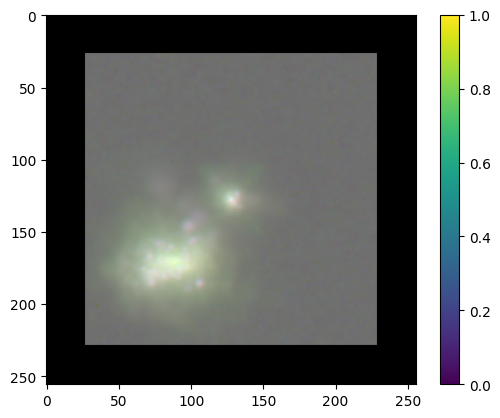

torch.Size([256, 256, 3])


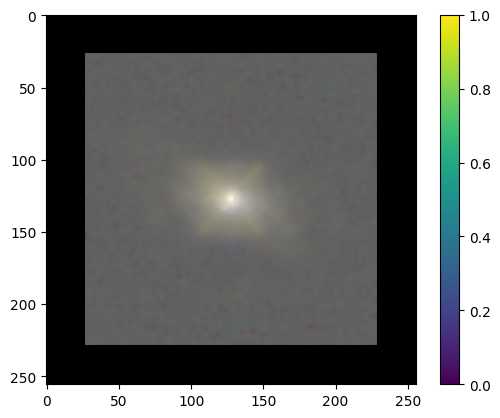

torch.Size([256, 256, 3])


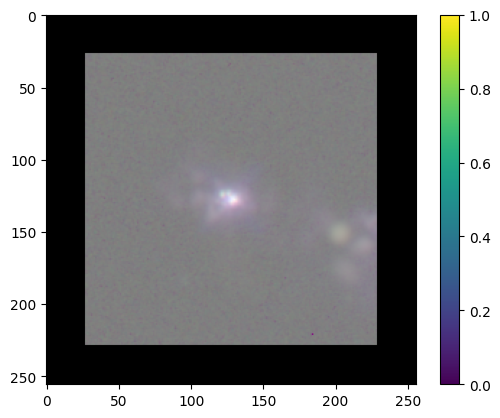

torch.Size([256, 256, 3])


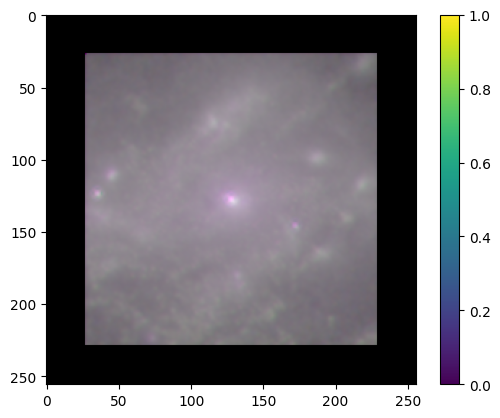

torch.Size([256, 256, 3])


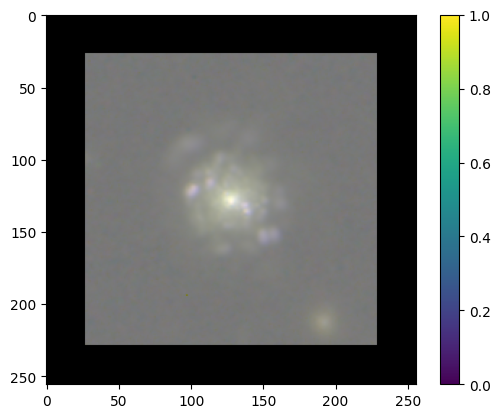

torch.Size([256, 256, 3])


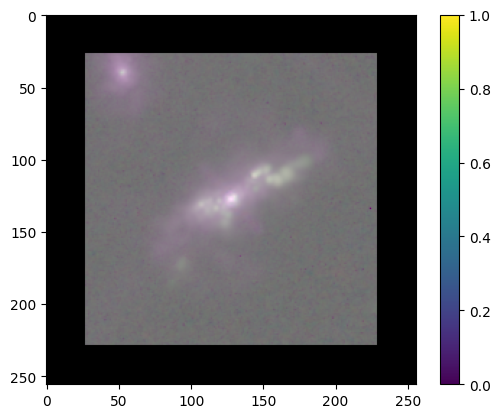

torch.Size([256, 256, 3])


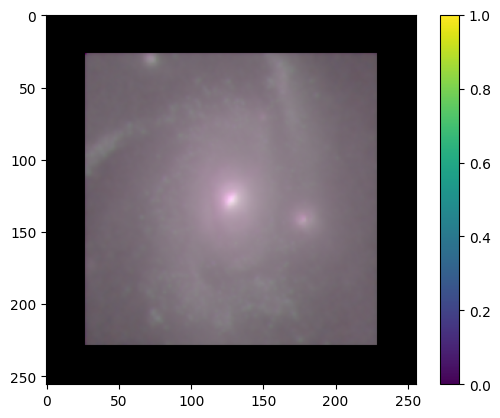

torch.Size([256, 256, 3])


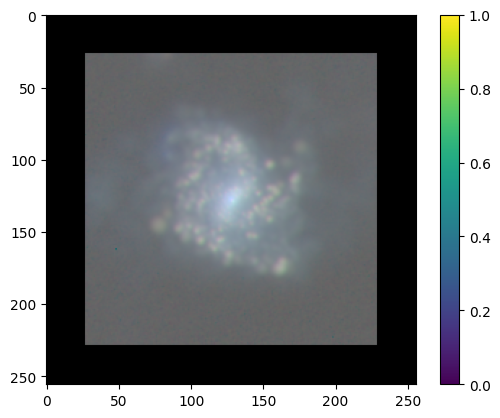

torch.Size([256, 256, 3])


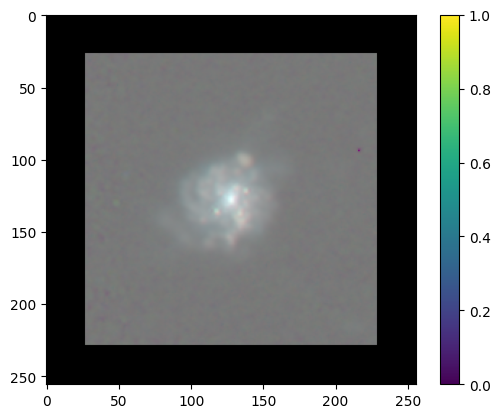

torch.Size([256, 256, 3])


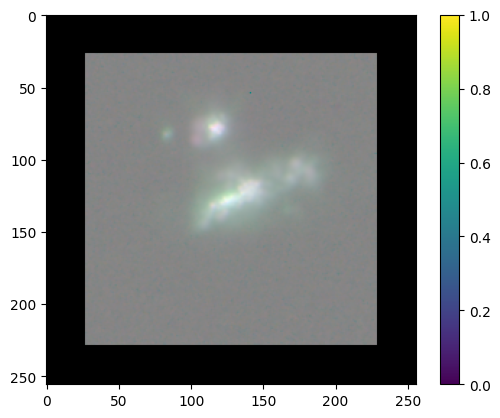

torch.Size([])
torch.Size([20])


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 0 is not equal to len(dims) = 3

In [34]:
examples = next(iter(validation_dataloader))
for label, img in enumerate(examples):
    print(np.shape(img[0]))
    #img = img.permute(2,3,1,0)
    print(np.shape(img))
    for i in range(0,20):
        print(np.shape(img[i].permute(1,2,0)))
        plt.imshow(img[i].permute(1,2,0))
        plt.colorbar()
        plt.show()

TypeError: tensor or list of tensors expected, got <class 'torch.utils.data.dataloader.DataLoader'>